In [ ]:
#https://github.com/guilhermedom/cnn-fashion-mnist/blob/main/notebooks/1.0-gdfs-cnn-fashion-mnist.ipynb
#https://github.com/zubairsamo/Fashion-Mnist-Using-CNN

In [22]:
%pip install tensorflow
%pip install scikit-learn
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.utils import resample
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from scipy.stats import t

In [4]:
# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to 3D tensors (height, width, channels)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [6]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/alanzhang/Library/Python/3.10/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 23s - 12ms/step - accuracy: 0.8331 - loss: 0.4599 - val_accuracy: 0.8736 - val_loss: 0.3578
Epoch 2/10
1875/1875 - 24s - 13ms/step - accuracy: 0.8885 - loss: 0.3068 - val_accuracy: 0.8896 - val_loss: 0.3010
Epoch 3/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9045 - loss: 0.2605 - val_accuracy: 0.8905 - val_loss: 0.2870
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9170 - loss: 0.2270 - val_accuracy: 0.9011 - val_loss: 0.2712
Epoch 5/10
1875/1875 - 23s - 13ms/step - accuracy: 0.9256 - loss: 0.2015 - val_accuracy: 0.9080 - val_loss: 0.2641
Epoch 6/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9329 - loss: 0.1790 - val_accuracy: 0.9133 - val_loss: 0.2455
Epoch 7/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9399 - loss: 0.1607 - val_accuracy: 0.9035 - val_loss: 0.2809
Epoch 8/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9460 - loss: 0.1452 - val_accuracy: 0.9139 - val_loss: 0.2585
Epoch 9/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9523 - loss: 0.1256 - val_a

In [10]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.913


In [13]:
# Mini-batch Bootstrap resampling for confidence interval estimation
n_iterations = 10
batch_size = 128  # Adjust batch size as needed
accuracy_results = []

for _ in range(n_iterations):
    print(f'Iteration {_ + 1}/{n_iterations}')
    # Randomly select indices for the mini-batch
    indices = np.random.choice(train_images.shape[0], size=100, replace=True)
    indices_tensor = tf.convert_to_tensor(indices)  # Convert numpy array to tensor
    resampled_images = tf.gather(train_images, indices_tensor)
    resampled_labels = tf.gather(train_labels, indices_tensor)

    permuted_train_labels = np.random.permutation(resampled_labels)
    
    model.fit(resampled_images, permuted_train_labels, epochs=10, verbose=0)
    
    # Evaluate model on test data
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    accuracy_results.append(acc)  # Append accuracy value to the list
    print(f'ccuracy: {acc:.3f}')

# Compute confidence intervals
p_value = (np.sum(np.array(accuracy_results) >= test_acc) + 1) / (n_iterations + 1)

print("p-value:", p_value)

alpha = 0.05
z_score = stats.norm.ppf(1 - alpha / 2)

# Compute the standard error of the permutation test accuracies
std_error = np.std(accuracy_results) / np.sqrt(n_iterations)

# Compute the margin of error
margin_of_error = z_score * std_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = test_acc - margin_of_error
upper_bound = test_acc + margin_of_error

print("p-value:", p_value)
print("95% Confidence Interval:", (lower_bound, upper_bound))


Iteration 1/10
ccuracy: 0.138
Iteration 2/10
ccuracy: 0.144
Iteration 3/10
ccuracy: 0.132
Iteration 4/10
ccuracy: 0.083
Iteration 5/10
ccuracy: 0.118
Iteration 6/10
ccuracy: 0.092
Iteration 7/10
ccuracy: 0.142
Iteration 8/10
ccuracy: 0.087
Iteration 9/10
ccuracy: 0.159
Iteration 10/10
ccuracy: 0.119
p-value: 0.09090909090909091
p-value: 0.09090909090909091
95% Confidence Interval: (0.8974312303082873, 0.9285687448961805)


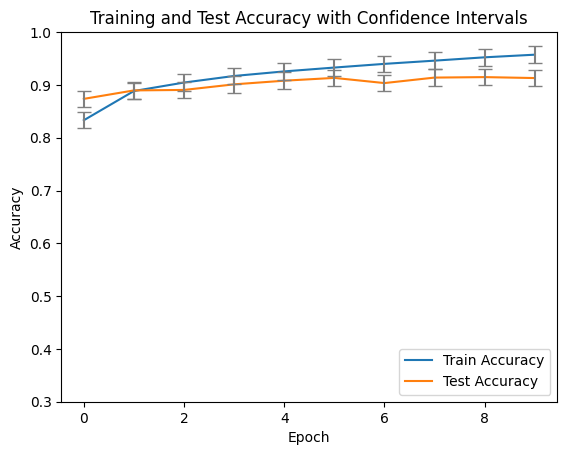

In [15]:
# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')


# Plot confidence intervals
for epoch, (train_acc, test_acc) in enumerate(zip(history.history['accuracy'], history.history['val_accuracy'])):
    plt.errorbar(epoch, train_acc, yerr=margin_of_error, fmt='none', ecolor='gray', capsize=5)
    plt.errorbar(epoch, test_acc, yerr=margin_of_error, fmt='none', ecolor='gray', capsize=5)

plt.title('Training and Test Accuracy with Confidence Intervals')
plt.show()